### Spacy Thesaurus basiert

In [2]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("scraped_data.db")

df = pd.read_sql_query("SELECT * FROM reviews", conn)
df.head()

,ID,URL,Scraped_at,Author,Posted,Modified,Title,Subtitle,Score,Verdict,Review_Text,Long_Text,Quotes,Tokenized_Long_Text,Preprocessed_Long_Text,spacy_polarity,spacy_subjectivity,bert_label
0,aad9a4c3-8a9b-4789-b239-8d6872da6b7e,https://www.ign.com/articles/arcs-board-game-r...,2025-03-30 15:20:27,Matt Thrower,2024-11-13T15:10:01.708Z,2024-11-13T15:20:56.240Z,Arcs Board Game Review,A deviously deep game of space conquest.,10.0,Arcs is not the first game to try and balance ...,Arcs is not the first game to try and balance ...,"Space conquest games are ten a penny, includin...",None,"Space conquest games are ten a penny , includi...",space conquest game penny include good war boa...,0.047016,0.451624,POSITIVE
1,3b738a45-14a4-4e9f-9c50-c37458bb5844,https://www.ign.com/articles/elden-ring-shadow...,2025-03-30 15:20:29,Mitchell Saltzman,2024-06-18T14:00:00.000Z,2024-06-25T22:46:45.861Z,Elden Ring: Shadow of the Erdtree DLC Review,Untarnished.,10.0,FromSoftware says Shadow of the Erdtree is the...,"Like the base game did before it, Elden Ring: ...","When I gave Elden Ring a 10 two years ago, I d...","According to our count, there are more than 40...","When I gave Elden Ring a 10 two years ago , I ...",give elden ring year ago incredible game raise...,0.073373,0.582546,POSITIVE
2,85dfd49f-59ce-45cb-8b86-657c001455de,https://www.ign.com/articles/stardew-valley-re...,2025-03-30 15:20:30,Shailyn Cotten,2024-05-07T16:00:00.000Z,2024-07-12T17:14:15.989Z,Stardew Valley Review - 2024,Eight years of impressive updates have grown S...,10.0,Stardew Valley is not only the best farming ga...,"More than just a cozy farming sim, eight years...",Editor's Note: This review takes a fresh look ...,Multitasking efficiently is a deceptively tens...,Editor 's Note : This review takes a fresh loo...,editor note review take fresh look stardew val...,0.082206,0.534168,POSITIVE
3,dc47b511-7668-4107-b7c0-8c63266ac963,https://www.ign.com/articles/asgards-wrath-2-r...,2025-03-30 15:20:31,Travis Northup,2023-12-14T14:00:00.000Z,2023-12-14T20:40:01.659Z,Asgard’s Wrath 2 Review,This open-world action RPG sets a new gold sta...,10.0,Asgard’s Wrath 2 is the full-fledged VR open-w...,Asgard’s Wrath 2 is an open-world action RPG t...,For those who have been patiently waiting on t...,This sequel improves and expands upon just abo...,For those who have been patiently waiting on t...,patiently wait sideline vr reason couch flail ...,0.161854,0.569769,POSITIVE
4,003f6d65-549f-477c-822b-6f57a8a9105e,https://www.ign.com/articles/baldurs-gate-3-re...,2025-03-30 15:20:32,Leana Hafer,2023-08-18T23:32:25.376Z,2024-01-31T19:38:28.947Z,Baldur's Gate 3 Review,A new high-water mark for CRPGs with satisfyin...,10.0,I don't want to say every CRPG going forward s...,"With crunchy, tactical RPG combat, a memorable...","Every once in a long while, a game comes along...","This is a world that will rarely tell you, 'No...","Every once in a long while , a game comes alon...",long game come memorable exciting fresh write ...,0.115140,0.607652,POSITIVE


In [6]:
test = df["Preprocessed_Long_Text"][0]

In [23]:
import spacy
from spacytextblob.spacytextblob import SpacyTextBlob

# spaCy-Modell laden
nlp = spacy.blank("en")

# spacytextblob zur Pipeline hinzufügen
nlp.add_pipe("spacytextblob")

print(nlp.pipe_names)


['spacytextblob']


In [ ]:
nlp = spacy.load('en_core_web_sm')
nlp.add_pipe('spacytextblob')

doc = nlp(test)

# TextBlob-kompatibler Zugriff
print("Polarity:", doc._.blob.polarity) # zwischen -1 und 1
print("Subjectivity:", doc._.blob.subjectivity) # zwischen 0 und 1

Polarity: 0.04701598731301701
Subjectivity: 0.45162369808409414


In [28]:
from tqdm import tqdm

tqdm.pandas()


def get_polarity(text):
    doc = nlp(text)
    return doc._.blob.polarity

def get_subjectivity(text):
    doc = nlp(text)
    return doc._.blob.subjectivity

df["spacy_polarity"] = df["Preprocessed_Long_Text"].progress_apply(get_polarity)
df["spacy_subjectivity"] = df["Preprocessed_Long_Text"].progress_apply(get_subjectivity)

df.head()

100%|██████████| 6945/6945 [11:25<00:00, 10.13it/s]   


,ID,URL,Scraped_at,Author,Posted,Modified,Title,Subtitle,Score,Verdict,Review_Text,Long_Text,Quotes,Tokenized_Long_Text,Preprocessed_Long_Text,spacy_polarity,spacy_subjectivity
0,aad9a4c3-8a9b-4789-b239-8d6872da6b7e,https://www.ign.com/articles/arcs-board-game-r...,2025-03-30 15:20:27,Matt Thrower,2024-11-13T15:10:01.708Z,2024-11-13T15:20:56.240Z,Arcs Board Game Review,A deviously deep game of space conquest.,10.0,Arcs is not the first game to try and balance ...,Arcs is not the first game to try and balance ...,"Space conquest games are ten a penny, includin...",None,"Space conquest games are ten a penny , includi...",space conquest game penny include good war boa...,0.047016,0.451624
1,3b738a45-14a4-4e9f-9c50-c37458bb5844,https://www.ign.com/articles/elden-ring-shadow...,2025-03-30 15:20:29,Mitchell Saltzman,2024-06-18T14:00:00.000Z,2024-06-25T22:46:45.861Z,Elden Ring: Shadow of the Erdtree DLC Review,Untarnished.,10.0,FromSoftware says Shadow of the Erdtree is the...,"Like the base game did before it, Elden Ring: ...","When I gave Elden Ring a 10 two years ago, I d...","According to our count, there are more than 40...","When I gave Elden Ring a 10 two years ago , I ...",give elden ring year ago incredible game raise...,0.073373,0.582546
2,85dfd49f-59ce-45cb-8b86-657c001455de,https://www.ign.com/articles/stardew-valley-re...,2025-03-30 15:20:30,Shailyn Cotten,2024-05-07T16:00:00.000Z,2024-07-12T17:14:15.989Z,Stardew Valley Review - 2024,Eight years of impressive updates have grown S...,10.0,Stardew Valley is not only the best farming ga...,"More than just a cozy farming sim, eight years...",Editor's Note: This review takes a fresh look ...,Multitasking efficiently is a deceptively tens...,Editor 's Note : This review takes a fresh loo...,editor note review take fresh look stardew val...,0.082206,0.534168
3,dc47b511-7668-4107-b7c0-8c63266ac963,https://www.ign.com/articles/asgards-wrath-2-r...,2025-03-30 15:20:31,Travis Northup,2023-12-14T14:00:00.000Z,2023-12-14T20:40:01.659Z,Asgard’s Wrath 2 Review,This open-world action RPG sets a new gold sta...,10.0,Asgard’s Wrath 2 is the full-fledged VR open-w...,Asgard’s Wrath 2 is an open-world action RPG t...,For those who have been patiently waiting on t...,This sequel improves and expands upon just abo...,For those who have been patiently waiting on t...,patiently wait sideline vr reason couch flail ...,0.161854,0.569769
4,003f6d65-549f-477c-822b-6f57a8a9105e,https://www.ign.com/articles/baldurs-gate-3-re...,2025-03-30 15:20:32,Leana Hafer,2023-08-18T23:32:25.376Z,2024-01-31T19:38:28.947Z,Baldur's Gate 3 Review,A new high-water mark for CRPGs with satisfyin...,10.0,I don't want to say every CRPG going forward s...,"With crunchy, tactical RPG combat, a memorable...","Every once in a long while, a game comes along...","This is a world that will rarely tell you, 'No...","Every once in a long while , a game comes alon...",long game come memorable exciting fresh write ...,0.115140,0.607652


### Huggingface siebert/sentiment-roberta-large-english Sentiment Analyse

In [38]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("text-classification", model="siebert/sentiment-roberta-large-english")

pipe("I hate you")

Device set to use mps:0


[{'label': 'NEGATIVE', 'score': 0.9991401433944702}]

In [39]:
tqdm.pandas()

def get_sentiment_label(text):
    result = pipe(text, truncation=True)[0]
    return result["label"]

df["bert_label"] = df["Preprocessed_Long_Text"].progress_apply(get_sentiment_label)

print(df[["Preprocessed_Long_Text", "bert_label"]].head())



100%|██████████| 6945/6945 [3:11:11<00:00,  1.65s/it]     


                              Preprocessed_Long_Text bert_label
0  space conquest game penny include good war boa...   POSITIVE
1  give elden ring year ago incredible game raise...   POSITIVE
2  editor note review take fresh look stardew val...   POSITIVE
3  patiently wait sideline vr reason couch flail ...   POSITIVE
4  long game come memorable exciting fresh write ...   POSITIVE


In [43]:
# Save the DataFrame to a new SQLite table
df.to_sql("reviews", conn, if_exists="replace", index=False)

6945

### Analyse

In [44]:
df.head()

,ID,URL,Scraped_at,Author,Posted,Modified,Title,Subtitle,Score,Verdict,Review_Text,Long_Text,Quotes,Tokenized_Long_Text,Preprocessed_Long_Text,spacy_polarity,spacy_subjectivity,bert_label
0,aad9a4c3-8a9b-4789-b239-8d6872da6b7e,https://www.ign.com/articles/arcs-board-game-r...,2025-03-30 15:20:27,Matt Thrower,2024-11-13T15:10:01.708Z,2024-11-13T15:20:56.240Z,Arcs Board Game Review,A deviously deep game of space conquest.,10.0,Arcs is not the first game to try and balance ...,Arcs is not the first game to try and balance ...,"Space conquest games are ten a penny, includin...",None,"Space conquest games are ten a penny , includi...",space conquest game penny include good war boa...,0.047016,0.451624,POSITIVE
1,3b738a45-14a4-4e9f-9c50-c37458bb5844,https://www.ign.com/articles/elden-ring-shadow...,2025-03-30 15:20:29,Mitchell Saltzman,2024-06-18T14:00:00.000Z,2024-06-25T22:46:45.861Z,Elden Ring: Shadow of the Erdtree DLC Review,Untarnished.,10.0,FromSoftware says Shadow of the Erdtree is the...,"Like the base game did before it, Elden Ring: ...","When I gave Elden Ring a 10 two years ago, I d...","According to our count, there are more than 40...","When I gave Elden Ring a 10 two years ago , I ...",give elden ring year ago incredible game raise...,0.073373,0.582546,POSITIVE
2,85dfd49f-59ce-45cb-8b86-657c001455de,https://www.ign.com/articles/stardew-valley-re...,2025-03-30 15:20:30,Shailyn Cotten,2024-05-07T16:00:00.000Z,2024-07-12T17:14:15.989Z,Stardew Valley Review - 2024,Eight years of impressive updates have grown S...,10.0,Stardew Valley is not only the best farming ga...,"More than just a cozy farming sim, eight years...",Editor's Note: This review takes a fresh look ...,Multitasking efficiently is a deceptively tens...,Editor 's Note : This review takes a fresh loo...,editor note review take fresh look stardew val...,0.082206,0.534168,POSITIVE
3,dc47b511-7668-4107-b7c0-8c63266ac963,https://www.ign.com/articles/asgards-wrath-2-r...,2025-03-30 15:20:31,Travis Northup,2023-12-14T14:00:00.000Z,2023-12-14T20:40:01.659Z,Asgard’s Wrath 2 Review,This open-world action RPG sets a new gold sta...,10.0,Asgard’s Wrath 2 is the full-fledged VR open-w...,Asgard’s Wrath 2 is an open-world action RPG t...,For those who have been patiently waiting on t...,This sequel improves and expands upon just abo...,For those who have been patiently waiting on t...,patiently wait sideline vr reason couch flail ...,0.161854,0.569769,POSITIVE
4,003f6d65-549f-477c-822b-6f57a8a9105e,https://www.ign.com/articles/baldurs-gate-3-re...,2025-03-30 15:20:32,Leana Hafer,2023-08-18T23:32:25.376Z,2024-01-31T19:38:28.947Z,Baldur's Gate 3 Review,A new high-water mark for CRPGs with satisfyin...,10.0,I don't want to say every CRPG going forward s...,"With crunchy, tactical RPG combat, a memorable...","Every once in a long while, a game comes along...","This is a world that will rarely tell you, 'No...","Every once in a long while , a game comes alon...",long game come memorable exciting fresh write ...,0.115140,0.607652,POSITIVE


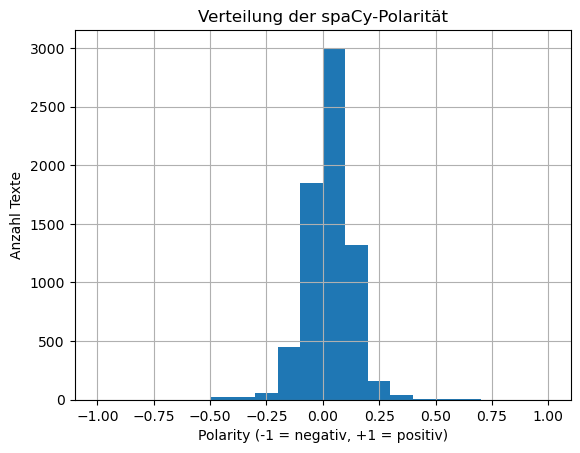

In [ ]:
import matplotlib.pyplot as plt

df["spacy_polarity"].hist(bins=20)
plt.title("Verteilung der spaCy-Polarität")
plt.xlabel("Polarity (-1 = negativ, +1 = positiv)")
plt.ylabel("Anzahl Texte")
plt.grid(True)
plt.show()

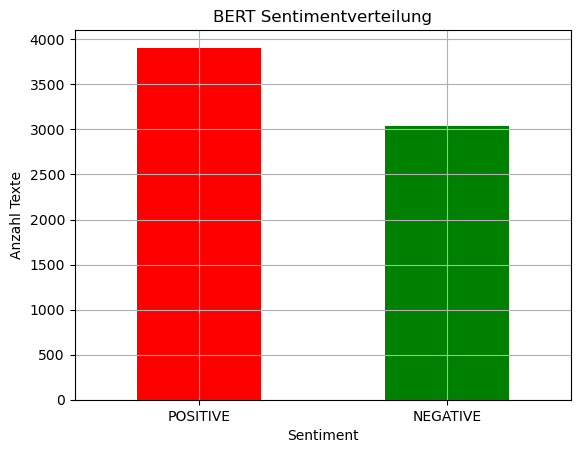

In [46]:
df["bert_label"].value_counts().plot(kind="bar", color=["red", "green"])
plt.title("BERT Sentimentverteilung")
plt.xlabel("Sentiment")
plt.ylabel("Anzahl Texte")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()


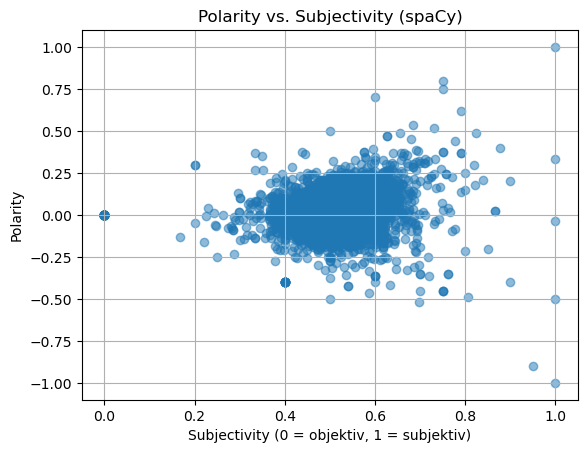

In [47]:
plt.scatter(df["spacy_subjectivity"], df["spacy_polarity"], alpha=0.5)
plt.title("Polarity vs. Subjectivity (spaCy)")
plt.xlabel("Subjectivity (0 = objektiv, 1 = subjektiv)")
plt.ylabel("Polarity")
plt.grid(True)
plt.show()


NameError: name 'plt' is not defined

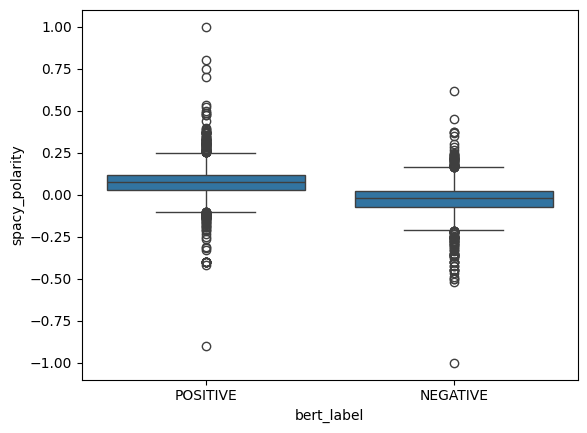

In [6]:
import seaborn as sns

sns.boxplot(x="bert_label", y="spacy_polarity", data=df)
plt.title("spaCy Polarity je nach BERT-Klasse")
plt.xlabel("BERT Label")
plt.ylabel("spaCy Polarity")
plt.grid(True)
plt.show()


In [49]:
correlation = df["spacy_polarity"].corr(df["spacy_subjectivity"])
print(f"Korrelation zwischen Polarity und Subjectivity: {correlation:.2f}")


Korrelation zwischen Polarity und Subjectivity: 0.17


In [50]:
# POSITIVE wenn polarity > 0, NEGATIVE wenn <= 0
df["spacy_label"] = df["spacy_polarity"].apply(lambda x: "POSITIVE" if x > 0 else "NEGATIVE")

# Vergleich
consistency = (df["spacy_label"] == df["bert_label"]).mean()
print(f"Übereinstimmung spaCy vs. BERT: {consistency*100:.1f}%")


Übereinstimmung spaCy vs. BERT: 75.7%


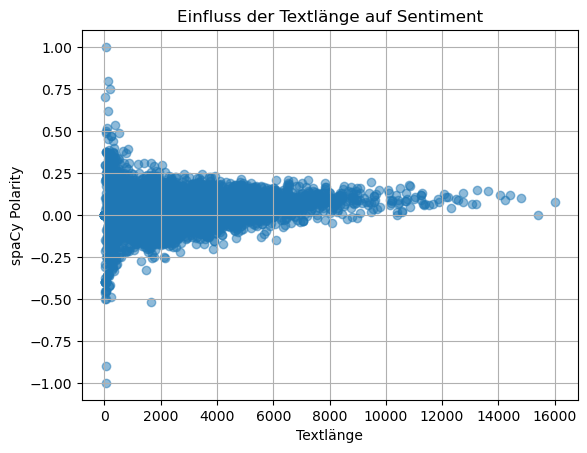

In [53]:
df["text_length"] = df["Preprocessed_Long_Text"].str.len()

plt.scatter(df["text_length"], df["spacy_polarity"], alpha=0.5)
plt.xlabel("Textlänge")
plt.ylabel("spaCy Polarity")
plt.title("Einfluss der Textlänge auf Sentiment")
plt.grid(True)
plt.show()


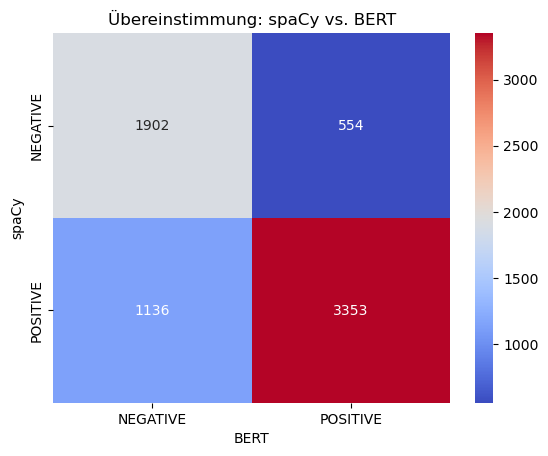

In [54]:
df["spacy_label"] = df["spacy_polarity"].apply(lambda x: "POSITIVE" if x > 0 else "NEGATIVE")
conf_matrix = pd.crosstab(df["spacy_label"], df["bert_label"])

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="coolwarm")
plt.title("Übereinstimmung: spaCy vs. BERT")
plt.xlabel("BERT")
plt.ylabel("spaCy")
plt.show()

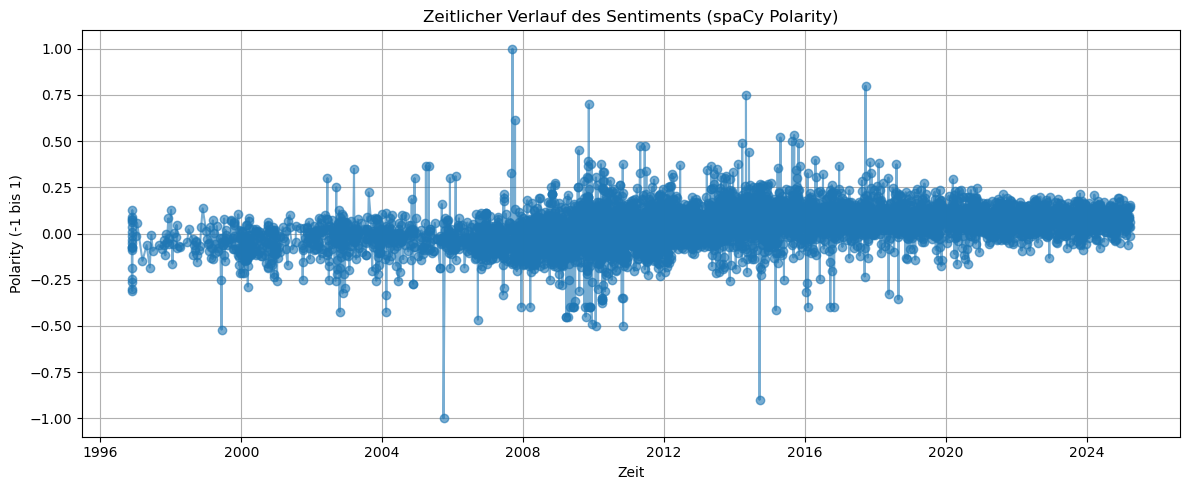

In [71]:
# Sicherstellen, dass Posted datetime ist
df["Posted"] = pd.to_datetime(df["Posted"], utc=True, errors="coerce")

# Zeilen mit NaT entfernen
df_clean = df.dropna(subset=["Posted", "spacy_polarity"])

# Nach Datum sortieren
df_sorted = df_clean.sort_values("Posted")

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(df_sorted["Posted"], df_sorted["spacy_polarity"], marker="o", linestyle="-", alpha=0.6)
plt.title("Zeitlicher Verlauf des Sentiments (spaCy Polarity)")
plt.xlabel("Zeit")
plt.ylabel("Polarity (-1 bis 1)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [11]:
import matplotlib.pyplot as plt

# Sicherstellen, dass Posted datetime ist
df["Posted"] = pd.to_datetime(df["Posted"], utc=True)

# Nur für den Plot einen temporären Index setzen
df_time = df.copy()
df_time = df_time.set_index("Posted")

# Wöchentliche Aggregation von spaCy Polarity
sentiment_over_time = df_time["spacy_polarity"].resample("W").mean()

# Plotten
plt.figure(figsize=(10, 5))
plt.plot(sentiment_over_time, marker="o")
plt.title("Durchschnittliches Sentiment über Zeit (spaCy)")
plt.xlabel("Datum (Wochen)")
plt.ylabel("Durchschnittliche Polarity")
plt.grid(True)
plt.tight_layout()
plt.show()


KeyError: 'Posted'

In [48]:
import numpy as np
conn = sqlite3.connect("scraped_data.db")

df = pd.read_sql_query("SELECT Score, spacy_polarity, bert_label FROM reviews", conn)
# Nur gültige numerische Scores verwenden
df = df[pd.to_numeric(df['Score'], errors='coerce').notna()]
# Score glätten: 0.5–1.49 → 1, 1.5–2.49 → 2, usw.
df['Score'] = np.floor(df['Score'] + 0.5).astype(int)

df

,Score,spacy_polarity,bert_label
0,10,0.047016,POSITIVE
1,10,0.073373,POSITIVE
2,10,0.082206,POSITIVE
3,10,0.161854,POSITIVE
4,10,0.115140,POSITIVE
...,...,...,...
6940,1,-0.147701,NEGATIVE
6941,1,-0.310714,NEGATIVE
6942,1,-0.278750,NEGATIVE
6943,1,-0.188889,NEGATIVE


In [49]:
# Kategorisierung von spacy_polarity
df['spacy_sentiment'] = df['spacy_polarity'].apply(lambda x: 'positive' if x > 0 else 'negative')

# Gruppierung für BERT
bert_counts = df.groupby(['Score', 'bert_label']).size().reset_index(name='count')
bert_pivot = bert_counts.pivot(index='Score', columns='bert_label', values='count').fillna(0)

# Gruppierung für spaCy
spacy_counts = df.groupby(['Score', 'spacy_sentiment']).size().reset_index(name='count')
spacy_pivot = spacy_counts.pivot(index='Score', columns='spacy_sentiment', values='count').fillna(0)

In [50]:
bert_pivot.columns

Index(['NEGATIVE', 'POSITIVE'], dtype='object', name='bert_label')

<Figure size 1000x600 with 0 Axes>

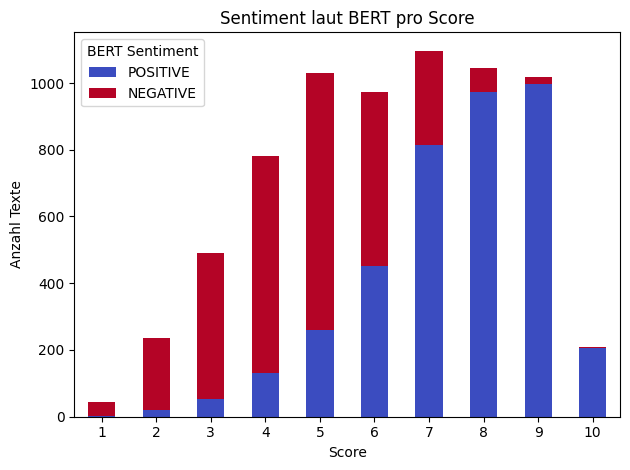

In [51]:
plt.figure(figsize=(10, 6))
bert_pivot[['POSITIVE', 'NEGATIVE']].plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Sentiment laut BERT pro Score')
plt.xlabel('Score')
plt.ylabel('Anzahl Texte')
plt.xticks(rotation=0)
plt.legend(title='BERT Sentiment')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

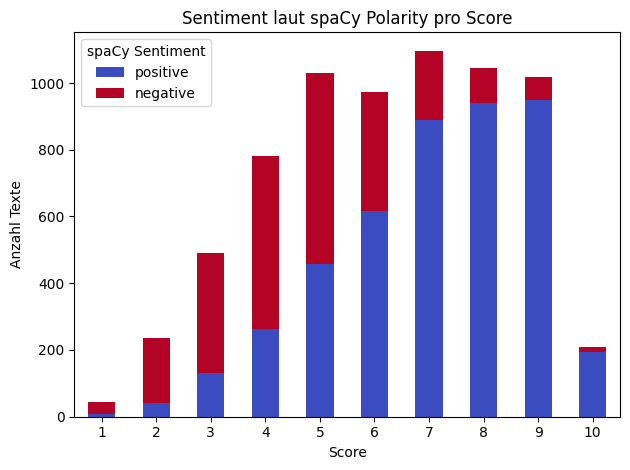

In [52]:
plt.figure(figsize=(10, 6))
spacy_pivot[['positive', 'negative']].plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Sentiment laut spaCy Polarity pro Score')
plt.xlabel('Score')
plt.ylabel('Anzahl Texte')
plt.xticks(rotation=0)
plt.legend(title='spaCy Sentiment')
plt.tight_layout()
plt.show()
